## **Assignment - 6: Deep Learning – Auto-Encoders & Convolution Neural Networks**
### ID: eo9232
### Name: Md Reza
### IE7860 - Winter 2022

# **Convolutional Neural Networks**

In [1]:
from __future__ import print_function
import numpy as np

from tensorflow.keras.layers import Activation, Dense, Dropout
from tensorflow.keras import layers, losses
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils.np_utils import to_categorical

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

### **Data Loading & Preprocessing**

In [2]:
#loading data
(x_train,y_train), (x_test,y_test) = fashion_mnist.load_data()
# compute the number of labels
num_labels = len(np.unique(y_train))

In [3]:
# Reshaping data as needed by the model
x_train = np.reshape(x_train,(-1,28,28,1))
x_test = np.reshape(x_test,(-1,28,28,1))
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1), (60000,), (10000,))

In [4]:
# Normalizing
x_train = x_train/255
x_test = x_test/255

In [5]:
# Implementing one hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [6]:
# Creating model object
model = Sequential()

### **Building The MLP Model**

In [7]:
# Network Parameters
input_shape = (28,28,1)
batch_size = 128
kernel_size = 3
pool_size = 2
filters = 64
dropout = 0.2

# Model is a stack of CNN-ReLU-MaxPooling
model = Sequential()
model.add(Conv2D(filters=filters,
                 kernel_size=kernel_size,
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size))
model.add(Conv2D(filters=filters,
                 kernel_size=kernel_size,
                 activation='relu'))
model.add(MaxPooling2D(pool_size))
model.add(Conv2D(filters=filters,
                 kernel_size=kernel_size,
                 activation='relu'))
model.add(Flatten())
# dropout added as regularizer
model.add(Dropout(dropout))
# output layer is 10-dim one-hot vector
model.add(Dense(num_labels))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)              

### **Model Compilation** ##

In [8]:
model.compile(optimizer="adam",loss="categorical_crossentropy", metrics=["accuracy"])

In [9]:
es = EarlyStopping(monitor='val_loss', mode='auto',verbose=0, patience=5)

In [10]:
# Training the model
history = model.fit(x_train, y_train, batch_size=124, epochs=50, validation_data=(x_test,y_test), callbacks=[es])

Epoch 1/50
484/484 [==============================] - 10s 10ms/step - loss: 0.6226 - accuracy: 0.7713 - val_loss: 0.4148 - val_accuracy: 0.8501
Epoch 2/50
484/484 [==============================] - 3s 7ms/step - loss: 0.3889 - accuracy: 0.8594 - val_loss: 0.3556 - val_accuracy: 0.8707
Epoch 3/50
484/484 [==============================] - 3s 7ms/step - loss: 0.3369 - accuracy: 0.8771 - val_loss: 0.3223 - val_accuracy: 0.8846
Epoch 4/50
484/484 [==============================] - 3s 7ms/step - loss: 0.3073 - accuracy: 0.8877 - val_loss: 0.3050 - val_accuracy: 0.8904
Epoch 5/50
484/484 [==============================] - 3s 7ms/step - loss: 0.2872 - accuracy: 0.8951 - val_loss: 0.2964 - val_accuracy: 0.8942
Epoch 6/50
484/484 [==============================] - 3s 7ms/step - loss: 0.2681 - accuracy: 0.9008 - val_loss: 0.2795 - val_accuracy: 0.8998
Epoch 7/50
484/484 [==============================] - 3s 7ms/step - loss: 0.2533 - accuracy: 0.9059 - val_loss: 0.2736 - val_accuracy: 0.9039
Epoc

### **Evaluate The MLP Model**

#### **Training accuracy** ####

In [11]:
# Evaluate Model
TrainAccuracy = model.evaluate (x_train, y_train, verbose=0)

for name, value in zip (model.metrics_names, TrainAccuracy):
    print("Train - " + name, ': ', value * 100)
print()

Train - loss :  10.948338359594345
Train - accuracy :  96.04833126068115



#### **Test accuracy** ####

In [12]:
# Evaluate Model
TestAccuracy = model.evaluate (x_test, y_test, verbose=0)

for name, value in zip (model.metrics_names, TestAccuracy):
    print("Test - " + name, ': ', value * 100)
print()

Test - loss :  25.606292486190796
Test - accuracy :  91.62999987602234



In [13]:
%config notebookBackend.figure_format = 'svg'

def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

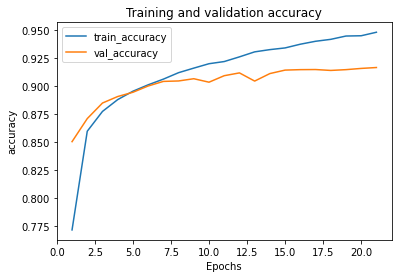

In [14]:
plot_metric(history, 'accuracy')

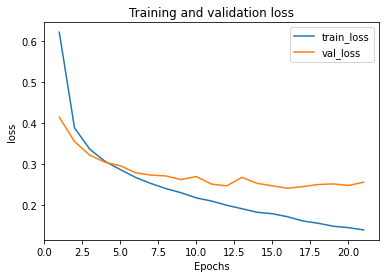

In [15]:
plot_metric(history, 'loss')

In [16]:
pos = np.argmin(history.history['val_loss'])
print("The epoch with the minimum validation loss is:", pos+1)
print("The Validation Accuracy is: {0:.5f}".format(history.history['val_accuracy'][pos]))

The epoch with the minimum validation loss is: 16
The Validation Accuracy is: 0.91440


# **Autoencoder**

In [17]:
import keras
from keras import layers
from keras import regularizers

### **Data Loading & Preprocessing**

In [18]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


### **Building The MLP Model**

In [19]:
# This is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# This is our input image
input_img = keras.Input(shape=(784,))
# Add a Dense layer with a L1 activity regularizer
encoded = layers.Dense(encoding_dim, activation='relu',
                activity_regularizer=regularizers.l1(10e-5))(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(784, activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)

In [20]:
# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)

In [21]:
# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

### **Model Compilation** ##

In [22]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_1 (Dense)             (None, 32)                25120     
                                                                 
 dense_2 (Dense)             (None, 784)               25872     
                                                                 
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [23]:
ae_history = autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=100,
                shuffle=True,
                validation_data=(x_test, x_test))


Epoch 1/50
600/600 [==============================] - 2s 3ms/step - loss: 0.3724 - val_loss: 0.3263
Epoch 2/50
600/600 [==============================] - 2s 4ms/step - loss: 0.3143 - val_loss: 0.3085
Epoch 3/50
600/600 [==============================] - 2s 3ms/step - loss: 0.3014 - val_loss: 0.2998
Epoch 4/50
600/600 [==============================] - 2s 3ms/step - loss: 0.2960 - val_loss: 0.2966
Epoch 5/50
600/600 [==============================] - 2s 3ms/step - loss: 0.2932 - val_loss: 0.2944
Epoch 6/50
600/600 [==============================] - 2s 3ms/step - loss: 0.2917 - val_loss: 0.2933
Epoch 7/50
600/600 [==============================] - 2s 3ms/step - loss: 0.2907 - val_loss: 0.2925
Epoch 8/50
600/600 [==============================] - 2s 3ms/step - loss: 0.2899 - val_loss: 0.2918
Epoch 9/50
600/600 [==============================] - 2s 3ms/step - loss: 0.2893 - val_loss: 0.2912
Epoch 10/50
600/600 [==============================] - 2s 3ms/step - loss: 0.2888 - val_loss: 0.2908

### **Evaluate The Model**

In [24]:
# Trainning & Validation loss 
t_avg = sum(ae_history.history['loss'])/len(ae_history.history['loss'])
v_avg = sum(ae_history.history['val_loss'])/len(ae_history.history['val_loss'])

print("The Trainning Loss ", round(t_avg,4))
print("The Validation Loss ", round(v_avg,4))

The Trainning Loss  0.2887
The Validation Loss  0.2897


### **Display Original & Reconstructed Images**

In [25]:
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

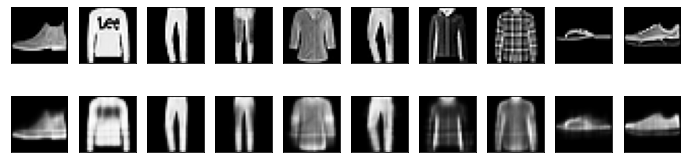

In [26]:
n = 10  # How many digits we will display
plt.figure(figsize=(12, 3))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### **Plot Testing & Validation Loss**

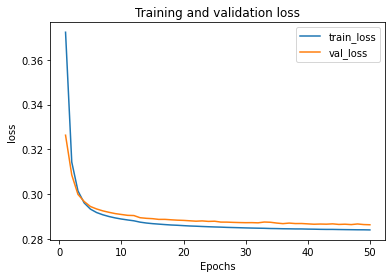

In [27]:
plot_metric(ae_history, 'loss')